In [1]:
import gc
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

from sklearn.cluster import SpectralClustering
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/GonieAhn/Data-Science-online-course-from-gonie/main/Data%20Store/example_data.csv")

In [3]:
data.head()

,censor,event,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,...,gender,str2,strat,symptom,cd40,cd420,cd496,r,cd80,cd820
0,0,1090,43,66.679,0,1,0,100,0,1,...,1,1,3,0,504,353,660,1,870,782
1,1,794,31,73.030,0,1,0,100,0,1,...,1,1,3,0,244,225,106,1,708,699
2,0,957,41,66.226,0,1,1,100,0,1,...,1,1,3,0,401,366,453,1,889,720
3,1,188,35,78.019,0,1,0,100,0,1,...,1,1,3,0,221,132,-1,0,221,759
4,1,308,40,83.009,0,1,0,100,0,1,...,1,1,3,1,150,90,20,1,1730,1160


In [4]:
Y = data['censor']
X = data.drop(columns=['censor'])

In [5]:
data.columns

Index(['censor', 'event', 'age', 'wtkg', 'hemo', 'homo', 'drugs', 'karnof',
       'oprior', 'z30', 'zprior', 'preanti', 'race', 'gender', 'str2', 'strat',
       'symptom', 'cd40', 'cd420', 'cd496', 'r', 'cd80', 'cd820'],
      dtype='object')

In [6]:
data['cd820'].unique()

array([ 782,  699,  720,  759, 1160,  990, 1000, 2265, 1698, 1017,  710,
       1780,  490, 1220, 1590, 1020,  420,  690,  850,  640, 1034,  590,
        847, 1191, 1287, 1070, 1143, 1125,  784, 1573,  799, 1415, 1338,
        440,  943,  967, 1909, 1905, 1282, 1131,  749,  611, 1558, 1488,
        823,  765,  528,  642, 1170,  545,  816, 1186,  449,  454,  460,
        786,  678, 1295,  612,  958, 1654, 1109, 2056,  920,  813,  945,
       1437,  602, 1482, 1054, 1126, 1176,  776,  567,  748,  950,  622,
        346,  740, 1313,  500, 1491,  858,  585, 1442,  353,  664,  391,
        637,  570,  673, 1140,  828, 1084, 1093, 1290,  566,  954, 1686,
       1406, 1375,  416, 1351, 1831,  936,  513,  739, 1179,  889,  938,
        846,  728,  792,  737,  627,  756, 1280,  583,  432, 1496, 1544,
       1197,  468,  741,  812,  603,  873,  867,  708, 1048,  396,  369,
        886,  621,  779, 1041,  318, 1007, 1162, 1130,  560, 1318, 1018,
        669,  899,  613, 1296, 1418, 1700,  620,  6

<Axes: >

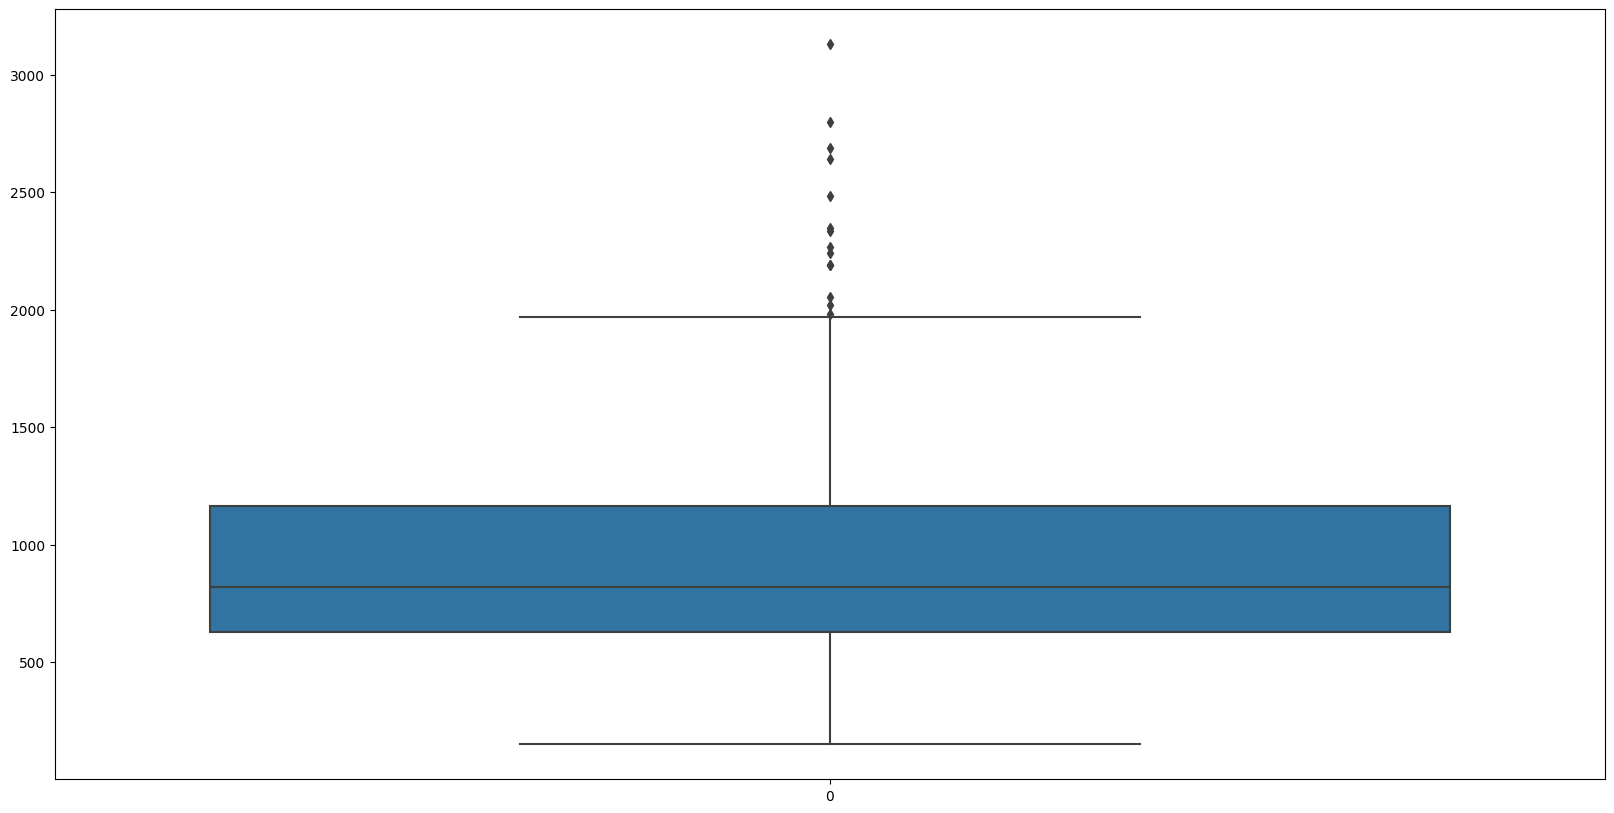

In [7]:
plt.figure(figsize=(20,10))
sns.boxplot(data['cd820'])

In [8]:
data['cd80'][data['cd80'].argsort()[::-1]]

480    4255
444    3190
515    3046
481    2840
356    2739
       ... 
256     337
506     333
516     324
488     225
3       221
Name: cd80, Length: 532, dtype: int64

In [9]:
data = data.drop(index=data['cd80'][data['cd80'].argsort()[::-1]][0:1].index)

In [10]:
data = data.drop(columns=['zprior', 'drugs'],)

In [11]:
data.reset_index(drop=True, inplace=True)

In [12]:
data

,censor,event,age,wtkg,hemo,homo,karnof,oprior,z30,preanti,...,gender,str2,strat,symptom,cd40,cd420,cd496,r,cd80,cd820
0,0,1090,43,66.679,0,1,100,0,1,1352,...,1,1,3,0,504,353,660,1,870,782
1,1,794,31,73.030,0,1,100,0,1,930,...,1,1,3,0,244,225,106,1,708,699
2,0,957,41,66.226,0,1,100,0,1,1329,...,1,1,3,0,401,366,453,1,889,720
3,1,188,35,78.019,0,1,100,0,1,964,...,1,1,3,0,221,132,-1,0,221,759
4,1,308,40,83.009,0,1,100,0,1,974,...,1,1,3,1,150,90,20,1,1730,1160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,0,1097,24,71.000,1,0,100,0,1,334,...,1,1,2,0,364,475,734,1,770,802
527,1,154,21,52.300,1,0,90,0,1,24,...,1,1,2,0,415,181,84,1,949,666
528,1,588,16,63.000,1,0,100,0,1,753,...,1,1,3,0,299,214,124,1,546,471
529,0,395,17,102.967,1,0,100,0,1,417,...,1,1,3,0,373,218,-1,0,1759,1030


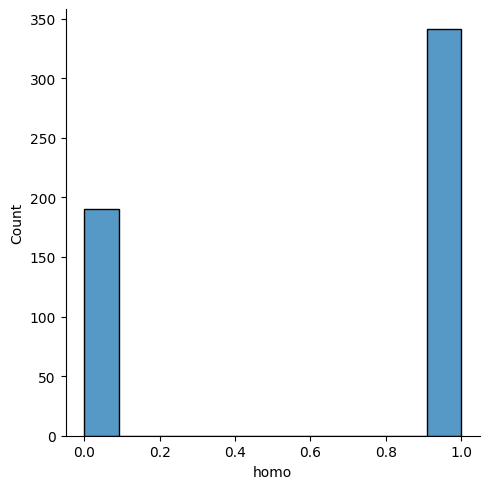

In [13]:
sns.displot(data['homo'])

In [20]:
Y = data['censor']
X = data.drop(columns=['censor'])

In [21]:
scaler = MinMaxScaler().fit(X)
X_scal = scaler.transform(X)
X_scal = pd.DataFrame(X_scal, columns=X.columns)

In [22]:
pca = PCA(n_components=2).fit(X)
X_PCA = pca.fit_transform(X)
X_EMM = pd.DataFrame(X_PCA, columns=['AXIS1','AXIS2'])
print(">>>> PCA Variance : {}".format(pca.explained_variance_ratio_))

>>>> PCA Variance : [0.44407949 0.27476111]


In [23]:
X_EMM

,AXIS1,AXIS2
0,-100.721601,954.147806
1,-309.658091,590.610418
2,-127.983872,948.063379
3,-601.597076,687.133792
4,760.864896,587.604545
...,...,...
526,-248.983252,-59.973003
527,-209.304782,-281.430423
528,-589.244854,450.718700
529,652.507945,28.091299


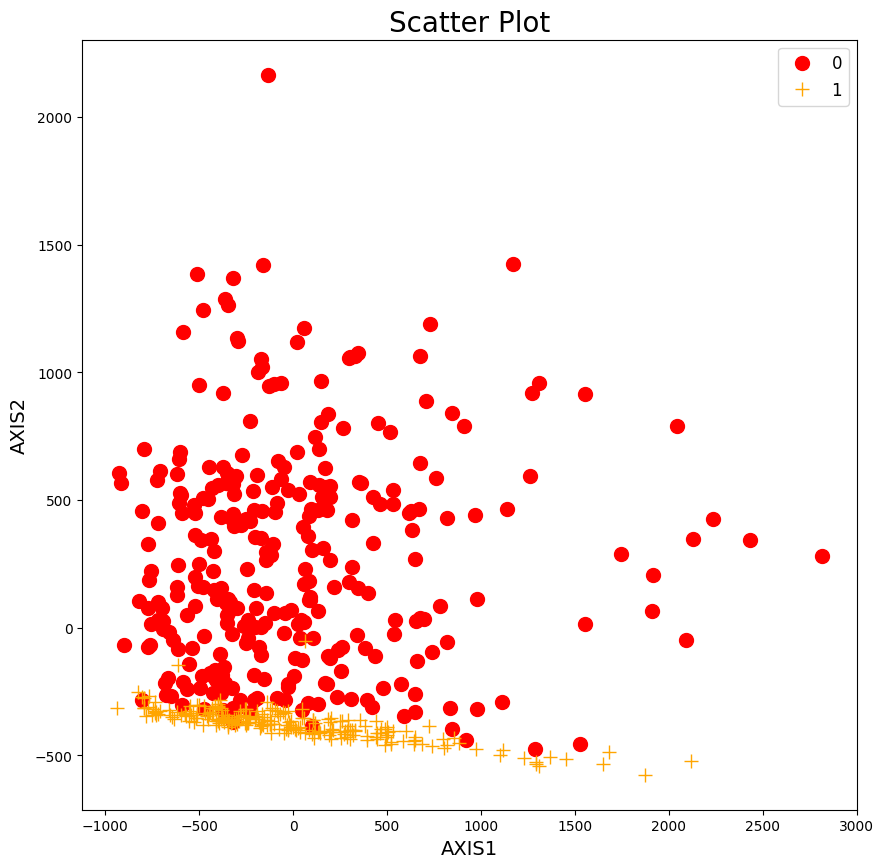

---------------------------------------------------------------------------------------------------


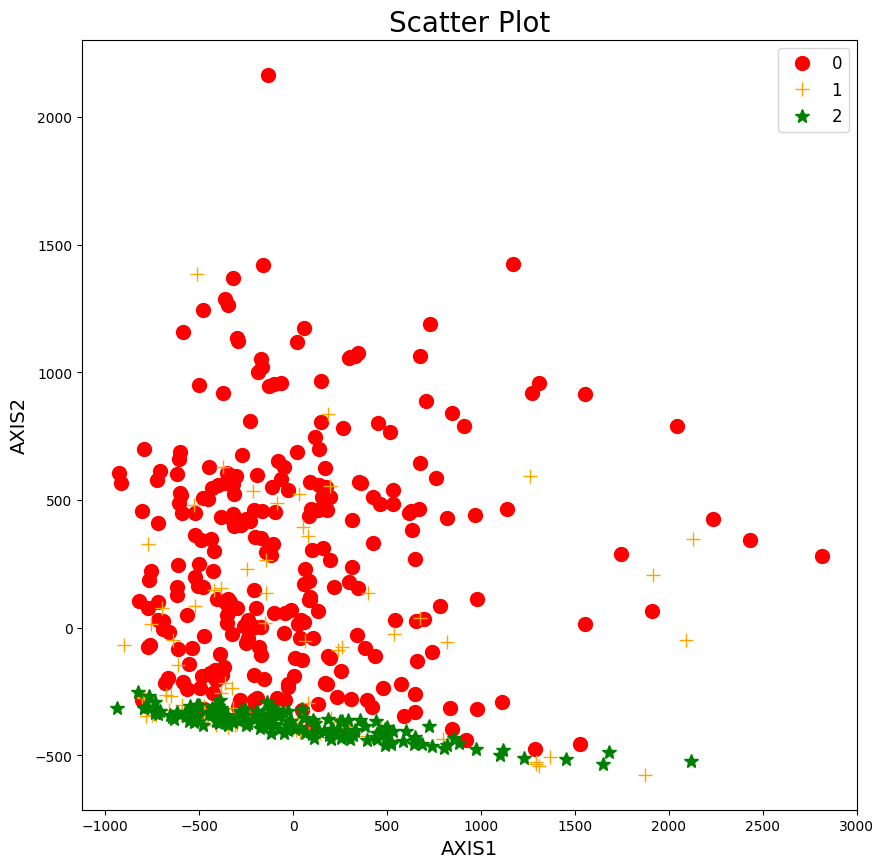

---------------------------------------------------------------------------------------------------


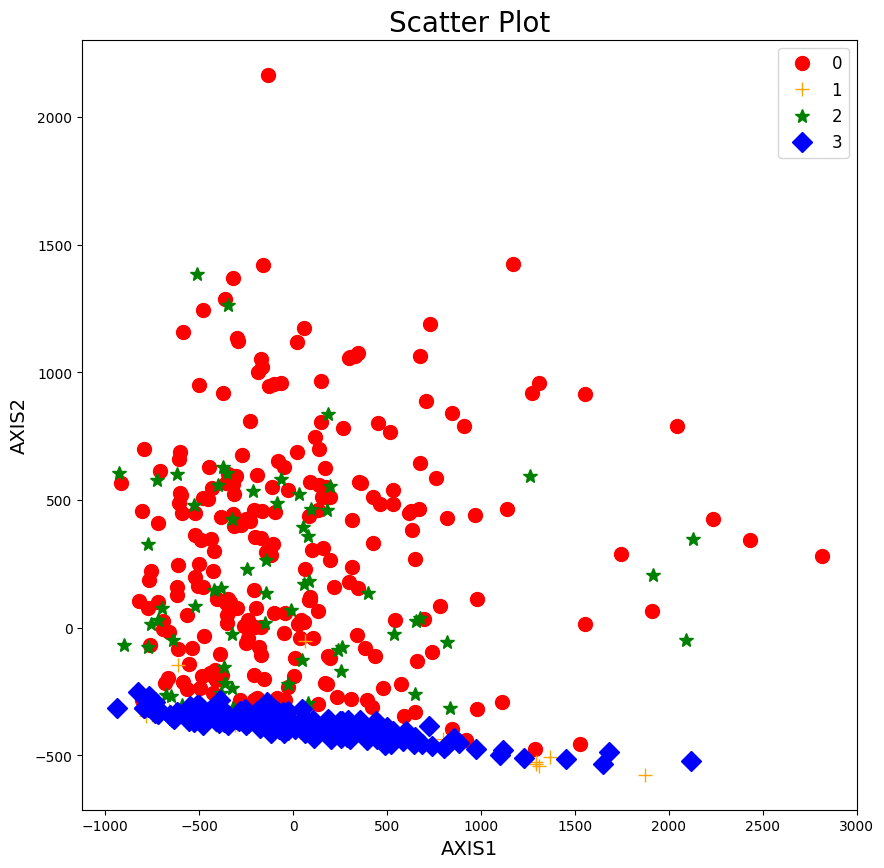

---------------------------------------------------------------------------------------------------


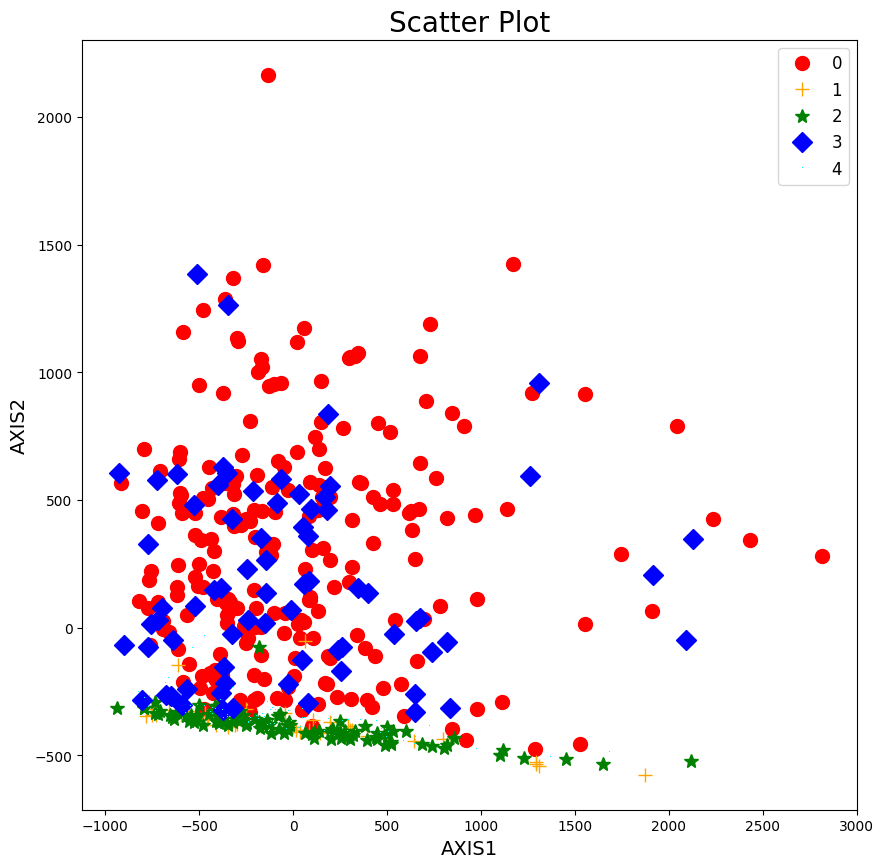

---------------------------------------------------------------------------------------------------


In [24]:
# K-means Modeling
for cluster in list(range(2, 6)):
    Cluster = SpectralClustering(n_clusters=cluster).fit(X_scal)
    labels = Cluster.labels_

    # label Add to DataFrame
    data['{} label'.format(cluster)] = labels
    labels = pd.DataFrame(labels, columns=['labels'])
    # Plot Data Setting
    plot_data = pd.concat([X_EMM, labels], axis=1)
    groups = plot_data.groupby('labels')

    mar = ['o', '+', '*', 'D', ',', 'h', '1', '2', '3', '4', 's', '<', '>']
    colo = ['red', 'orange', 'green', 'blue', 'cyan', 'magenta', 'black', 'yellow', 'grey', 'orchid', 'lightpink']

    fig, ax = plt.subplots(figsize=(10,10))
    for j, (name, group) in enumerate(groups):
        ax.plot(group['AXIS1'], 
                group['AXIS2'], 
                marker=mar[j],
                linestyle='',
                label=name,
                c = colo[j],
                ms=10)
        ax.legend(fontsize=12, loc='upper right') # legend position
    plt.title('Scatter Plot', fontsize=20)
    plt.xlabel('AXIS1', fontsize=14)
    plt.ylabel('AXIS2', fontsize=14)
    plt.show()
    print("---------------------------------------------------------------------------------------------------")

    gc.collect()

In [25]:
cm = confusion_matrix(data['censor'], data['2 label'])
print(cm)

[[185 166]
 [122  58]]


In [26]:
print("TesT Acc : {}".format((cm[0,0] + cm[1,1])/cm.sum()))
print("F1-Score : {}".format(f1_score(data['censor'], data['2 label'])))

TesT Acc : 0.4576271186440678
F1-Score : 0.28712871287128716
